In [25]:
import awkward as ak
import hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np

In [11]:
filename = "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root"
events = NanoEventsFactory.from_root(
    filename,
    schemaclass=NanoAODSchema.v7
).events()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f75bce908e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

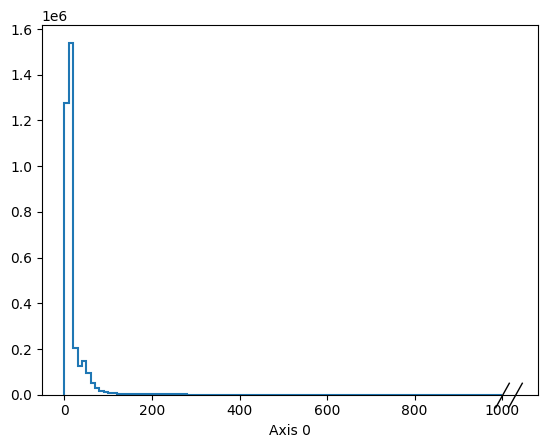

In [14]:
h = hist.Hist.new.Reg(100,0,1000).Double().fill(ak.flatten(events.Jet.pt))
h.plot()

In [32]:
integral = h.sum()
bin_values = h.values()
nbins = len(bin_values)
normed_values = np.array([])
for value in bin_values :
    normed_values = np.append(normed_values, value / integral)
normed_values

array([3.57844013e-01, 4.31395113e-01, 5.69827109e-02, 3.56187846e-02,
       4.15473996e-02, 2.67063795e-02, 1.39664029e-02, 8.00527013e-03,
       4.96149021e-03, 3.34933528e-03, 2.45817886e-03, 1.83809771e-03,
       1.45096748e-03, 1.24717046e-03, 1.10364354e-03, 1.06299626e-03,
       1.12663027e-03, 1.17596765e-03, 1.15690548e-03, 1.04645703e-03,
       9.04612064e-04, 7.48750797e-04, 6.46151474e-04, 5.49999650e-04,
       4.43475762e-04, 3.76477844e-04, 3.22655248e-04, 2.80326019e-04,
       2.54536025e-04, 1.85015173e-04, 1.62028439e-04, 1.37640075e-04,
       1.14653342e-04, 1.00356715e-04, 8.49387838e-05, 8.10142195e-05,
       6.36340063e-05, 5.97094421e-05, 4.90570534e-05, 4.23292289e-05,
       3.53210784e-05, 3.53210784e-05, 2.66309718e-05, 2.46686897e-05,
       2.35473856e-05, 2.04637994e-05, 1.85015173e-05, 1.70998872e-05,
       1.20540188e-05, 1.23343448e-05, 1.26146709e-05, 1.20540188e-05,
       9.25075863e-06, 8.40978057e-06, 7.28847650e-06, 8.40978057e-06,
      